# Linear Regression using Numpy and gradient descent

![](img_1.png)

![](img_2.png)

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=1234)

#fig = plt.figure(figsize=(8,6))
#plt.scatter(X[:,0], y, color='b', marker='o', s=30)
#plt.show()

X_train.shape,y_train.shape

((80, 1), (80,))

In [11]:
class LinearRegression:

    def __init__(self,lr=0.001,n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # init parameters
        n_samples , n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

783.8155465125494


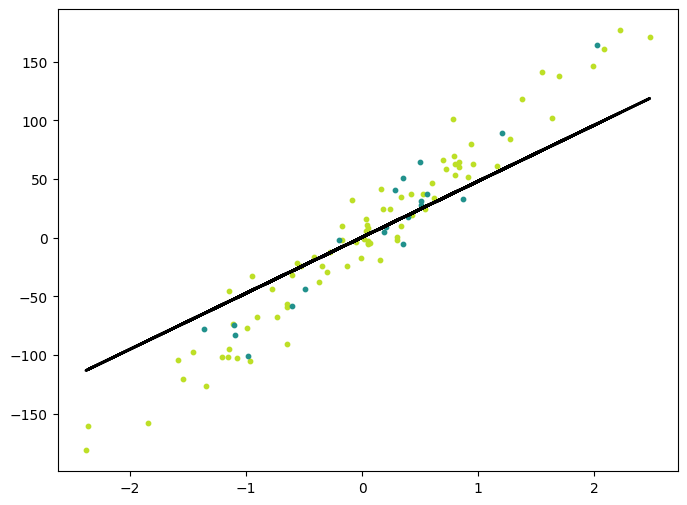

In [12]:
#  learning rate with 0.001

regressor = LinearRegression()
regressor.fit(X_train,y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

mse_value = mse(y_test,predicted)
print(mse_value)

# ploting
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m1 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')

305.7719958301902


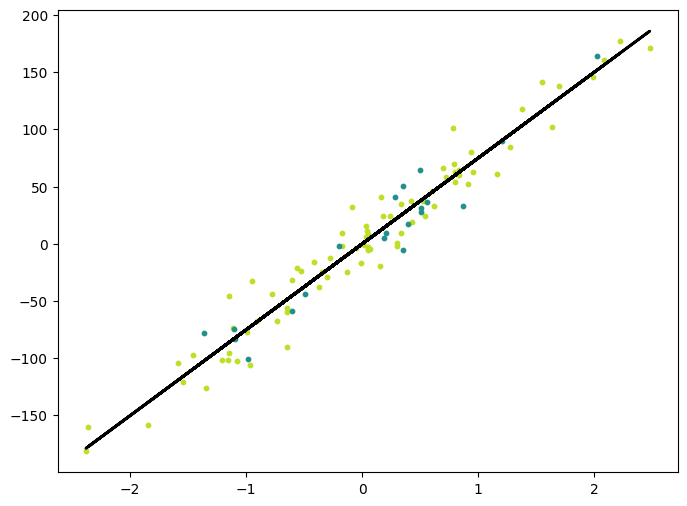

In [13]:
# learning rate with 0.01

regressor = LinearRegression(lr=0.01)
regressor.fit(X_train,y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted) ** 2)

mse_value = mse(y_test,predicted)
print(mse_value)

# ploting
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m1 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')

# Linear regression using scikit-learn

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# independent and dependent feauters
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# divide into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

print("independent feature of train data : ",X_train.shape)
print("dependent feature of train data : ",y_train.shape)

# fit the model using training data
reg = LinearRegression()
model_fit = reg.fit(X_train,y_train)

# prediction using test data
y_pred = reg.predict(X_test)

# error checking using mse
mse = mean_squared_error(y_test, y_pred)
print("mean squared error : ",mse)
print("slope : ",reg.coef_)
print("intercept : ",reg.intercept_)

independent feature of train data :  (80, 1)
dependent feature of train data :  (80,)
mean squared error :  305.7741316228642
slope :  [75.05935146]
intercept :  -0.1424160855882628


In [43]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9247515208302274

# Linear Regression Using Numpy and OLS

![](img_3.png)

In [17]:
import numpy as np

class LinearRegression_OLS:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self,X,y):
        mean_X = np.mean(X, axis=0)
        mean_y = np.mean(y)

        self.coefficients = np.zeros(X.shape[1])
        for i in range(X.shape[1]):
            numerator = np.sum( (X[:,i] - mean_X[i]) * (y - mean_y) )
            denominator = np.sum( (X[:,i] - mean_X[i]) ** 2)
            self.coefficients[i] = numerator / denominator 

        self.intercept = mean_y - np.sum(self.coefficients * mean_X)

    def predict(self,X):
        return np.dot(X, self.coefficients) + self.intercept

    def get_params(self):
        return self.coefficients, self.intercept

In [18]:
# Example data
weight = np.array([60, 65, 70, 75, 80])
age = np.array([25, 30, 35, 40, 45])
height = np.array([150, 155, 160, 165, 170])

# Combine features into a single matrix
X = np.column_stack((weight, age))
y = height

In [19]:
# Create an instance of the class
model = LinearRegression_OLS()

# Train the model using the fit method
model.fit(X, y)

# Get the parameters (coefficients and intercept)
coefficients, intercept = model.get_params()

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [1. 1.]
Intercept: 55.0


In [20]:
# Predict heights
predicted_height = model.predict(X)

print("Predicted Heights:", predicted_height)

Predicted Heights: [140. 150. 160. 170. 180.]


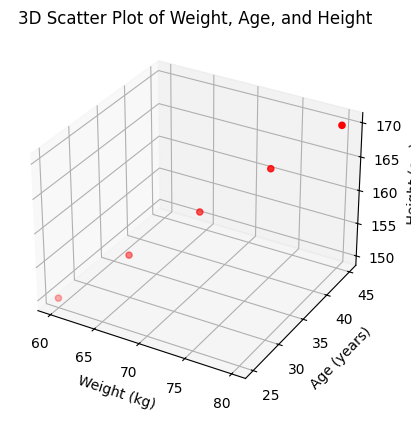

In [22]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
weight = np.array([60, 65, 70, 75, 80])
age = np.array([25, 30, 35, 40, 45])
height = np.array([150, 155, 160, 165, 170])

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(weight, age, height, color='r', marker='o')

# Labels and title
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Height (cm)')
ax.set_title('3D Scatter Plot of Weight, Age, and Height')

# Show the plot
plt.show()